In [17]:
import os
import re
import csv
import pandas as pd
from operator import itemgetter
import math
import numpy as np
import matplotlib.mlab as mlab
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')
from mpl_toolkits.mplot3d import axes3d
from sklearn import linear_model

## Web of Science

In [138]:
Bone = pd.read_excel("Bone.xlsx")
Polymer = pd.read_excel("Polymer.xlsx")
Tissue_Engineering = pd.read_excel("Tissue_Engineering.xlsx")
Hydrogel = pd.read_excel("Hydrogel.xlsx")
Scaffold = pd.read_excel("Scaffold.xlsx")
Nanoparticles = pd.read_excel("Nanoparticles.xlsx")
Adhesion = pd.read_excel("Adhesion.xlsx")
Regeneration = pd.read_excel("Regeneration.xlsx")
Microstructure = pd.read_excel("Microstructure.xlsx")
Chitosan = pd.read_excel("Chitosan.xlsx")

In [144]:
X = Nanoparticles[['citation','fundation','JSR']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Nanoparticles['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
model.summary()

Intercept: 
 0.0847661260786
Coefficients: 
 [  6.42941977e-06  -5.72265815e-04   6.49758925e-04]
Predicted TF_IDF: 
 [ 0.22259581]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     37.00
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           3.58e-07
Time:                        15:20:48   Log-Likelihood:                 29.111
No. Observations:                  19   AIC:                            -50.22
Df Residuals:                      15   BIC:                            -46.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0848      0.025      3.391      0.004       0.031       0.138
citation    6.429e-06   6.43e-06      1.001      0.333   -7.27e-06    2.01e-05
fundation     -0.0006      0.000     -2.944      0.010      -0.001      -0.000
JSR            0.0006      0.000      3.812      0.002       0.000       0.001
==============================================================================
Omnibus:                        0.281   Durbin-Watson:                   1.072
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.454
Skew:                           0.075   Prob(JB):                        0.797
Kurtosis:                       2.258   Cond. No.                     6.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
X = Bone[['citation','fundation','JSR']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Bone['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.471286463147
Coefficients: 
 [  1.39800694e-06  -8.10028138e-05   2.69552334e-05]
Predicted TF_IDF: 
 [ 0.47130071]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     8.268
Date:                Sat, 01 Dec 2018   Prob (F-statistic):            0.00175
Time:                        15:03:29   Log-Likelihood:                 51.757
No. Observations:                  19   AIC:                            -95.51
Df Residuals:                      15   BIC:                            -91.74
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4713      0.012     40.038      0.000       0.446       0.496
citation    1.398e-06   1.23e-06      1.140      0.272   -1.22e-06    4.01e-06
fundation    -8.1e-05   2.88e-05     -2.810      0.013      -0.000   -1.96e-05
JSR         2.696e-05   1.17e-05      2.312      0.035    2.11e-06    5.18e-05
==============================================================================
Omnibus:                        4.195   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                1.400
Skew:                           0.000   Prob(JB):                        0.497
Kurtosis:                       1.670   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
X = Polymer[['citation','fundation','JSR']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Polymer['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.580852244411
Coefficients: 
 [ -9.67398455e-08  -3.53675110e-05   1.12859518e-04]
Predicted TF_IDF: 
 [ 0.61117141]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     12.16
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           0.000269
Time:                        15:04:13   Log-Likelihood:                 32.215
No. Observations:                  19   AIC:                            -56.43
Df Residuals:                      15   BIC:                            -52.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5809      0.032     17.895      0.000       0.512       0.650
citation   -9.674e-08   2.15e-06     -0.045      0.965   -4.68e-06    4.49e-06
fundation  -3.537e-05   4.68e-05     -0.755      0.462      -0.000    6.45e-05
JSR            0.0001   5.34e-05      2.115      0.052   -8.98e-07       0.000
==============================================================================
Omnibus:                       11.718   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.142
Skew:                          -1.370   Prob(JB):                       0.0103
Kurtosis:                       5.011   Cond. No.                     2.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
X = Tissue_Engineering[['citation','fundation','JSR']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Tissue_Engineering['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.308834372735
Coefficients: 
 [  5.03249765e-06  -2.16632802e-04   3.69821596e-05]
Predicted TF_IDF: 
 [ 0.29836639]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     7.533
Date:                Sat, 01 Dec 2018   Prob (F-statistic):            0.00265
Time:                        15:04:39   Log-Likelihood:                 33.854
No. Observations:                  19   AIC:                            -59.71
Df Residuals:                      15   BIC:                            -55.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3088      0.028     11.034      0.000       0.249       0.368
citation    5.032e-06   5.13e-06      0.980      0.343   -5.91e-06     1.6e-05
fundation     -0.0002      0.000     -2.129      0.050      -0.000       2e-07
JSR         3.698e-05   3.33e-05      1.109      0.285   -3.41e-05       0.000
==============================================================================
Omnibus:                        1.774   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.294
Skew:                          -0.425   Prob(JB):                        0.524
Kurtosis:                       2.045   Cond. No.                     8.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
X = Hydrogel[['citation','fundation','JSR']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Hydrogel['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.202470825336
Coefficients: 
 [  7.38718642e-06  -8.08634502e-05  -2.53069771e-07]
Predicted TF_IDF: 
 [ 0.1944563]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     54.39
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           2.71e-08
Time:                        15:05:19   Log-Likelihood:                 46.528
No. Observations:                  19   AIC:                            -85.06
Df Residuals:                      15   BIC:                            -81.28
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2025      0.012     17.259      0.000       0.177       0.227
citation    7.387e-06    3.4e-06      2.175      0.046    1.48e-07    1.46e-05
fundation  -8.086e-05   8.66e-05     -0.934      0.365      -0.000       0.000
JSR        -2.531e-07   5.01e-05     -0.005      0.996      -0.000       0.000
==============================================================================
Omnibus:                        4.097   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                1.962
Skew:                           0.593   Prob(JB):                        0.375
Kurtosis:                       4.036   Cond. No.                     4.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
X = Scaffold[['citation','fundation','JSR']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Scaffold['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.251254361133
Coefficients: 
 [  1.12083679e-05  -3.27801668e-04   4.94941010e-05]
Predicted TF_IDF: 
 [ 0.23354659]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     11.32
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           0.000389
Time:                        15:05:37   Log-Likelihood:                 29.131
No. Observations:                  19   AIC:                            -50.26
Df Residuals:                      15   BIC:                            -46.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2513      0.032      7.849      0.000       0.183       0.319
citation    1.121e-05   6.04e-06      1.854      0.083   -1.67e-06    2.41e-05
fundation     -0.0003      0.000     -2.732      0.015      -0.001   -7.21e-05
JSR         4.949e-05    4.1e-05      1.208      0.246   -3.78e-05       0.000
==============================================================================
Omnibus:                        1.791   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.477
Skew:                          -0.556   Prob(JB):                        0.478
Kurtosis:                       2.206   Cond. No.                     7.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
X = Adhesion[['citation','fundation','JSR']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Adhesion['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.0729346402748
Coefficients: 
 [  1.02973538e-06  -5.59476510e-05   4.67348614e-05]
Predicted TF_IDF: 
 [ 0.08138093]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     13.01
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           0.000189
Time:                        15:07:54   Log-Likelihood:                 48.320
No. Observations:                  19   AIC:                            -88.64
Df Residuals:                      15   BIC:                            -84.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0729      0.020      3.649      0.002       0.030       0.116
citation     1.03e-06   3.34e-06      0.308      0.762    -6.1e-06    8.16e-06
fundation  -5.595e-05   5.97e-05     -0.938      0.363      -0.000    7.12e-05
JSR         4.673e-05   2.05e-05      2.283      0.037     3.1e-06    9.04e-05
==============================================================================
Omnibus:                        2.438   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.111
Skew:                          -0.056   Prob(JB):                        0.574
Kurtosis:                       1.821   Cond. No.                     7.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
X = Regeneration[['citation','fundation','JSR']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Regeneration['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.155524329424
Coefficients: 
 [  7.85047794e-06  -2.75534831e-04   9.58507610e-05]
Predicted TF_IDF: 
 [ 0.15688308]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     42.83
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           1.36e-07
Time:                        15:08:11   Log-Likelihood:                 46.158
No. Observations:                  19   AIC:                            -84.32
Df Residuals:                      15   BIC:                            -80.54
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1555      0.015     10.231      0.000       0.123       0.188
citation     7.85e-06   3.82e-06      2.054      0.058   -2.94e-07     1.6e-05
fundation     -0.0003   9.74e-05     -2.829      0.013      -0.000    -6.8e-05
JSR         9.585e-05   2.71e-05      3.542      0.003    3.82e-05       0.000
==============================================================================
Omnibus:                        3.115   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                1.285
Skew:                           0.154   Prob(JB):                        0.526
Kurtosis:                       1.764   Cond. No.                     5.90e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
X = Microstructure[['citation','fundation','JSR']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Microstructure['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.189247443607
Coefficients: 
 [  1.32027482e-05  -1.62714596e-04  -9.84489580e-05]
Predicted TF_IDF: 
 [ 0.14370535]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     3.009
Date:                Sat, 01 Dec 2018   Prob (F-statistic):             0.0633
Time:                        15:08:33   Log-Likelihood:                 49.031
No. Observations:                  19   AIC:                            -90.06
Df Residuals:                      15   BIC:                            -86.28
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1892      0.012     16.365      0.000       0.165       0.214
citation     1.32e-05   6.28e-06      2.104      0.053   -1.75e-07    2.66e-05
fundation     -0.0002      0.000     -1.363      0.193      -0.000    9.17e-05
JSR        -9.845e-05   8.61e-05     -1.143      0.271      -0.000    8.51e-05
==============================================================================
Omnibus:                        1.923   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.443
Skew:                           0.491   Prob(JB):                        0.486
Kurtosis:                       2.074   Cond. No.                     1.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
X = Chitosan[['citation','fundation','JSR']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Chitosan['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.134663637227
Coefficients: 
 [  1.39382719e-05  -2.16036617e-04  -1.67238669e-05]
Predicted TF_IDF: 
 [ 0.10832158]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     7.256
Date:                Sat, 01 Dec 2018   Prob (F-statistic):            0.00311
Time:                        15:08:44   Log-Likelihood:                 39.730
No. Observations:                  19   AIC:                            -71.46
Df Residuals:                      15   BIC:                            -67.68
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1347      0.014      9.670      0.000       0.105       0.164
citation    1.394e-05   9.24e-06      1.508      0.152   -5.76e-06    3.36e-05
fundation     -0.0002      0.000     -1.065      0.304      -0.001       0.000
JSR        -1.672e-05    6.3e-05     -0.266      0.794      -0.000       0.000
==============================================================================
Omnibus:                        0.481   Durbin-Watson:                   0.903
Prob(Omnibus):                  0.786   Jarque-Bera (JB):                0.568
Skew:                          -0.294   Prob(JB):                        0.753
Kurtosis:                       2.390   Cond. No.                     1.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Science Blogs

In [3]:
plos = pd.read_csv("plos2.csv")
scienceblog = pd.read_csv("Science_Blog.csv")
scientific_america = pd.read_csv("scientific_american_topics.csv")

In [4]:
social_media = plos + scienceblog + scientific_america

In [5]:
social_media = social_media.dropna()

In [6]:
social_media = social_media.drop('year', axis=1)

In [8]:
social_media.insert(0, 'year', range(2000, 2000 + len(social_media)))

In [10]:
social_media.to_csv('social_media.csv')

In [11]:
Bone_SC = pd.read_excel("Bone_SC.xlsx")
Polymer_SC = pd.read_excel("Polymer_SC.xlsx")
Tissue_Engineering_SC = pd.read_excel("Tissue_Engineering_SC.xlsx")
Hydrogel_SC = pd.read_excel("Hydrogel_SC.xlsx")
Scaffold_SC = pd.read_excel("Scaffold_SC.xlsx")
Nanoparticles_SC = pd.read_excel("Nanoparticles_SC.xlsx")
Adhesion_SC = pd.read_excel("Adhesion_SC.xlsx")
Regeneration_SC = pd.read_excel("Regeneration_SC.xlsx")
Microstructure_SC = pd.read_excel("Microstructure_SC.xlsx")
Chitosan_SC = pd.read_excel("Chitosan_SC.xlsx")

In [20]:
X = Bone_SC[['citation','fundation','JSR', 'Social_media']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Bone_SC['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.470519477175
Coefficients: 
 [  1.48305035e-06  -6.49312653e-05   1.87066450e-05   3.81194389e-05]
Predicted TF_IDF: 
 [ 0.47035416]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     8.053
Date:                Sun, 02 Dec 2018   Prob (F-statistic):            0.00138
Time:                        16:56:36   Log-Likelihood:                 53.831
No. Observations:                  19   AIC:                            -97.66
Df Residuals:                      14   BIC:                            -92.94
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4705      0.011     43.041      0.000       0.447       0.494
citation      1.483e-06   1.14e-06      1.302      0.214   -9.61e-07    3.93e-06
fundation    -6.493e-05   2.81e-05     -2.308      0.037      -0.000    -4.6e-06
JSR           1.871e-05   1.17e-05      1.599      0.132   -6.39e-06    4.38e-05
Social_media  3.812e-05   2.06e-05      1.848      0.086   -6.12e-06    8.24e-05
==============================================================================
Omnibus:                        0.824   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.711
Skew:                           0.418   Prob(JB):                        0.701
Kurtosis:                       2.553   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
X = Polymer_SC[['citation','fundation','JSR', 'Social_Media']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Polymer_SC['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.583547770609
Coefficients: 
 [ -9.86293347e-07   1.59279800e-05   7.79097602e-05   2.38754577e-03]
Predicted TF_IDF: 
 [ 0.65146959]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     14.16
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           7.93e-05
Time:                        16:58:43   Log-Likelihood:                 35.877
No. Observations:                  19   AIC:                            -61.75
Df Residuals:                      14   BIC:                            -57.03
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5835      0.028     21.045      0.000       0.524       0.643
citation     -9.863e-07   1.87e-06     -0.528      0.606   -4.99e-06    3.02e-06
fundation     1.593e-05   4.47e-05      0.356      0.727      -8e-05       0.000
JSR           7.791e-05   4.76e-05      1.638      0.124   -2.41e-05       0.000
Social_Media     0.0024      0.001      2.566      0.022       0.000       0.004
==============================================================================
Omnibus:                       18.015   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.828
Skew:                          -1.712   Prob(JB):                     4.95e-05
Kurtosis:                       6.650   Cond. No.                     2.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X = Tissue_Engineering_SC[['citation','fundation','JSR', 'Social_Media']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Tissue_Engineering_SC['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.3045322238
Coefficients: 
 [  5.55953090e-06  -1.33060407e-04   6.59556535e-06   1.53527670e-03]
Predicted TF_IDF: 
 [ 0.32095102]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     13.23
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           0.000115
Time:                        16:59:47   Log-Likelihood:                 39.985
No. Observations:                  19   AIC:                            -69.97
Df Residuals:                      14   BIC:                            -65.25
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3045      0.021     14.490      0.000       0.259       0.350
citation       5.56e-06   3.85e-06      1.444      0.171    -2.7e-06    1.38e-05
fundation       -0.0001   7.98e-05     -1.668      0.118      -0.000    3.81e-05
JSR           6.596e-06   2.64e-05      0.250      0.806      -5e-05    6.32e-05
Social_Media     0.0015      0.000      3.563      0.003       0.001       0.002
==============================================================================
Omnibus:                        0.995   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.918
Skew:                          -0.366   Prob(JB):                        0.632
Kurtosis:                       2.210   Cond. No.                     8.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X = Hydrogel_SC[['citation','fundation','JSR', 'Social_Media']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Hydrogel_SC['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.201835734101
Coefficients: 
 [  6.93130258e-06  -7.28751748e-05   2.99489391e-06   3.32447944e-03]
Predicted TF_IDF: 
 [ 0.25542594]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     38.77
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.98e-07
Time:                        17:00:38   Log-Likelihood:                 46.685
No. Observations:                  19   AIC:                            -83.37
Df Residuals:                      14   BIC:                            -78.65
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2018      0.012     16.660      0.000       0.176       0.228
citation      6.931e-06   3.61e-06      1.919      0.076   -8.15e-07    1.47e-05
fundation    -7.288e-05   9.04e-05     -0.806      0.434      -0.000       0.000
JSR           2.995e-06   5.19e-05      0.058      0.955      -0.000       0.000
Social_Media     0.0033      0.007      0.483      0.636      -0.011       0.018
==============================================================================
Omnibus:                        2.818   Durbin-Watson:                   1.419
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                1.102
Skew:                           0.453   Prob(JB):                        0.576
Kurtosis:                       3.756   Cond. No.                     5.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
X = Scaffold_SC[['citation','fundation','JSR', 'Social_Media']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Scaffold_SC['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.251895097804
Coefficients: 
 [  5.33082283e-06  -1.32170121e-04   3.46030658e-05   2.73946297e-03]
Predicted TF_IDF: 
 [ 0.29847596]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           0.000130
Time:                        17:01:50   Log-Likelihood:                 32.581
No. Observations:                  19   AIC:                            -55.16
Df Residuals:                      14   BIC:                            -50.44
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2519      0.028      9.116      0.000       0.193       0.311
citation      5.331e-06   5.73e-06      0.930      0.368   -6.96e-06    1.76e-05
fundation       -0.0001      0.000     -1.015      0.327      -0.000       0.000
JSR            3.46e-05   3.59e-05      0.965      0.351   -4.23e-05       0.000
Social_Media     0.0027      0.001      2.476      0.027       0.000       0.005
==============================================================================
Omnibus:                        1.176   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                0.644
Skew:                          -0.448   Prob(JB):                        0.725
Kurtosis:                       2.889   Cond. No.                     7.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X = Nanoparticles_SC[['citation','fundation','JSR', 'Social_Media']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Nanoparticles_SC['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.0721105706656
Coefficients: 
 [  2.69097477e-06  -2.72956727e-04   4.15059344e-04   4.15372864e-03]
Predicted TF_IDF: 
 [ 0.24415364]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     52.72
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           2.74e-08
Time:                        17:02:16   Log-Likelihood:                 35.269
No. Observations:                  19   AIC:                            -60.54
Df Residuals:                      14   BIC:                            -55.82
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0721      0.019      3.786      0.002       0.031       0.113
citation      2.691e-06   4.92e-06      0.547      0.593   -7.87e-06    1.32e-05
fundation       -0.0003      0.000     -1.626      0.126      -0.001    8.72e-05
JSR              0.0004      0.000      2.892      0.012       0.000       0.001
Social_Media     0.0042      0.001      3.573      0.003       0.002       0.007
==============================================================================
Omnibus:                        2.653   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                1.388
Skew:                           0.332   Prob(JB):                        0.500
Kurtosis:                       1.854   Cond. No.                     6.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X = Adhesion_SC[['citation','fundation','JSR', 'Social_Media']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Adhesion_SC['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.0803230685115
Coefficients: 
 [ -5.64835316e-07  -1.57839883e-05   4.30713363e-05   8.34980151e-05]
Predicted TF_IDF: 
 [ 0.09315774]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     10.13
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           0.000456
Time:                        17:02:46   Log-Likelihood:                 49.066
No. Observations:                  19   AIC:                            -88.13
Df Residuals:                      14   BIC:                            -83.41
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0803      0.021      3.814      0.002       0.035       0.125
citation     -5.648e-07   3.65e-06     -0.155      0.879   -8.39e-06    7.26e-06
fundation    -1.578e-05   7.03e-05     -0.225      0.825      -0.000       0.000
JSR           4.307e-05   2.07e-05      2.085      0.056   -1.24e-06    8.74e-05
Social_Media   8.35e-05   7.81e-05      1.070      0.303   -8.39e-05       0.000
==============================================================================
Omnibus:                        0.394   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.821   Jarque-Bera (JB):                0.522
Skew:                           0.127   Prob(JB):                        0.770
Kurtosis:                       2.228   Cond. No.                     8.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X = Regeneration_SC[['citation','fundation','JSR', 'Social_Media']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Regeneration_SC['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.172405249646
Coefficients: 
 [  4.14876185e-06  -7.87736429e-05   3.99843745e-05   3.04183289e-03]
Predicted TF_IDF: 
 [ 0.23135916]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     43.19
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           9.95e-08
Time:                        17:03:20   Log-Likelihood:                 49.316
No. Observations:                  19   AIC:                            -88.63
Df Residuals:                      14   BIC:                            -83.91
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1724      0.015     11.388      0.000       0.140       0.205
citation      4.149e-06    3.7e-06      1.121      0.281   -3.79e-06    1.21e-05
fundation    -7.877e-05      0.000     -0.659      0.521      -0.000       0.000
JSR           3.998e-05   3.36e-05      1.190      0.254   -3.21e-05       0.000
Social_Media     0.0030      0.001      2.350      0.034       0.000       0.006
==============================================================================
Omnibus:                        1.872   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.167
Skew:                          -0.306   Prob(JB):                        0.558
Kurtosis:                       1.951   Cond. No.                     6.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X = Microstructure_SC[['citation','fundation','JSR', 'Social_Media']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Microstructure_SC['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.187437925109
Coefficients: 
 [  1.16814017e-05  -1.22087443e-04  -1.05947801e-04   1.10473872e-04]
Predicted TF_IDF: 
 [ 0.145667]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     2.342
Date:                Sun, 02 Dec 2018   Prob (F-statistic):              0.105
Time:                        17:03:54   Log-Likelihood:                 49.422
No. Observations:                  19   AIC:                            -88.84
Df Residuals:                      14   BIC:                            -84.12
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1874      0.012     15.670      0.000       0.162       0.213
citation      1.168e-05   6.67e-06      1.752      0.102   -2.62e-06     2.6e-05
fundation       -0.0001      0.000     -0.924      0.371      -0.000       0.000
JSR             -0.0001   8.79e-05     -1.206      0.248      -0.000    8.25e-05
Social_Media     0.0001      0.000      0.767      0.456      -0.000       0.000
==============================================================================
Omnibus:                        3.945   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                2.108
Skew:                           0.559   Prob(JB):                        0.349
Kurtosis:                       1.812   Cond. No.                     1.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X = Chitosan_SC[['citation','fundation','JSR', 'Social_Media']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Chitosan_SC['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.121434571534
Coefficients: 
 [  6.42934297e-06   4.02332562e-05  -2.49710667e-05   2.92364365e-04]
Predicted TF_IDF: 
 [ 0.12335772]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     10.79
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           0.000333
Time:                        17:04:14   Log-Likelihood:                 44.575
No. Observations:                  19   AIC:                            -79.15
Df Residuals:                      14   BIC:                            -74.43
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1214      0.012     10.135      0.000       0.096       0.147
citation      6.429e-06   7.81e-06      0.823      0.424   -1.03e-05    2.32e-05
fundation     4.023e-05      0.000      0.220      0.829      -0.000       0.000
JSR          -2.497e-05   5.06e-05     -0.494      0.629      -0.000    8.35e-05
Social_Media     0.0003   9.58e-05      3.052      0.009    8.69e-05       0.000
==============================================================================
Omnibus:                        2.025   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                1.671
Skew:                          -0.659   Prob(JB):                        0.434
Kurtosis:                       2.388   Cond. No.                     2.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Google Search

In [38]:
Bone_GS = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\google_search_Topic\Bone.xlsx")
Polymer_GS = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\google_search_Topic\Polymer.xlsx")
Tissue_Engineering_GS = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\google_search_Topic\Tissue_Engineering.xlsx")
Hydrogel_GS = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\google_search_Topic\Hydrogel.xlsx")
Scaffold_GS = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\google_search_Topic\Scaffold.xlsx")
Nanoparticles_GS = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\google_search_Topic\Nanoparticles.xlsx")
Adhesion_GS = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\google_search_Topic\Adhesion.xlsx")
Regeneration_GS = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\google_search_Topic\Regeneration.xlsx")
Microstructure_GS = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\google_search_Topic\Microstructure.xlsx")
Chitosan_GS = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\google_search_Topic\Chitosan.xlsx")

,year,td_idf,citation,fundation,JSR,google_search
0,2000,0.465143,4251,0,436.544,0
1,2001,0.497588,8055,8,400.323,0
2,2002,0.468688,6111,1,554.236,0
3,2003,0.492196,6519,0,732.509,0
4,2004,0.540388,10007,0,1123.900,690
5,2005,0.518122,10524,0,1541.631,679
6,2006,0.505447,13806,7,1121.288,602
7,2007,0.551110,17815,41,1739.140,556
8,2008,0.539287,21274,223,1807.134,555
9,2009,0.529353,23556,599,2329.849,547


In [41]:
X = Bone_GS[['citation','fundation','JSR', 'google_search']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Bone_GS['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 50
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.471135898754
Coefficients: 
 [  8.41717335e-07  -4.83073422e-05   1.37438017e-05   5.27868482e-05]
Predicted TF_IDF: 
 [ 0.47308448]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     9.500
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           0.000627
Time:                        17:34:09   Log-Likelihood:                 54.952
No. Observations:                  19   AIC:                            -99.90
Df Residuals:                      14   BIC:                            -95.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4711      0.010     45.748      0.000       0.449       0.493
citation       8.417e-07    1.1e-06      0.766      0.456   -1.51e-06     3.2e-06
fundation     -4.831e-05   2.88e-05     -1.680      0.115      -0.000    1.34e-05
JSR            1.374e-05   1.16e-05      1.182      0.257   -1.12e-05    3.87e-05
google_search  5.279e-05   2.23e-05      2.366      0.033    4.93e-06       0.000
==============================================================================
Omnibus:                        3.685   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                1.404
Skew:                          -0.184   Prob(JB):                        0.495
Kurtosis:                       1.720   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
X = Polymer_GS[['citation','fundation','JSR', 'google_search']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Polymer_GS['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.571442911579
Coefficients: 
 [ -9.73480503e-07  -6.64137138e-06   1.04675401e-04   6.32254454e-05]
Predicted TF_IDF: 
 [ 0.60329998]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     10.06
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           0.000473
Time:                        17:36:07   Log-Likelihood:                 33.364
No. Observations:                  19   AIC:                            -56.73
Df Residuals:                      14   BIC:                            -52.01
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5714      0.032     17.640      0.000       0.502       0.641
citation      -9.735e-07   2.19e-06     -0.444      0.664   -5.68e-06    3.73e-06
fundation     -6.641e-06   5.04e-05     -0.132      0.897      -0.000       0.000
JSR               0.0001   5.24e-05      1.999      0.065   -7.62e-06       0.000
google_search  6.323e-05   4.71e-05      1.342      0.201   -3.78e-05       0.000
==============================================================================
Omnibus:                        6.247   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                3.822
Skew:                          -1.027   Prob(JB):                        0.148
Kurtosis:                       3.779   Cond. No.                     2.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
X = Tissue_Engineering_GS[['citation','fundation','JSR', 'google_search']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Tissue_Engineering_GS['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.302674029209
Coefficients: 
 [  4.07561682e-06  -1.22342731e-04   1.95895196e-05   1.03577735e-04]
Predicted TF_IDF: 
 [ 0.29826252]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     6.876
Date:                Sun, 02 Dec 2018   Prob (F-statistic):            0.00280
Time:                        17:36:51   Log-Likelihood:                 35.448
No. Observations:                  19   AIC:                            -60.90
Df Residuals:                      14   BIC:                            -56.17
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3027      0.027     11.244      0.000       0.245       0.360
citation       4.076e-06   4.92e-06      0.828      0.422   -6.48e-06    1.46e-05
fundation        -0.0001      0.000     -1.079      0.299      -0.000       0.000
JSR            1.959e-05   3.35e-05      0.584      0.569   -5.24e-05    9.15e-05
google_search     0.0001   6.48e-05      1.599      0.132   -3.53e-05       0.000
==============================================================================
Omnibus:                        1.786   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.430
Skew:                          -0.519   Prob(JB):                        0.489
Kurtosis:                       2.147   Cond. No.                     8.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
X = Hydrogel_GS[['citation','fundation','JSR', 'google_search']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Hydrogel_GS['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.199298060582
Coefficients: 
 [  6.70327379e-06  -6.21295419e-05  -4.77951177e-06   2.31414822e-05]
Predicted TF_IDF: 
 [ 0.19220187]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     39.12
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.87e-07
Time:                        17:37:10   Log-Likelihood:                 46.763
No. Observations:                  19   AIC:                            -83.53
Df Residuals:                      14   BIC:                            -78.80
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1993      0.013     15.173      0.000       0.171       0.227
citation       6.703e-06   3.66e-06      1.832      0.088   -1.14e-06    1.46e-05
fundation     -6.213e-05    9.4e-05     -0.661      0.519      -0.000       0.000
JSR            -4.78e-06   5.18e-05     -0.092      0.928      -0.000       0.000
google_search  2.314e-05   3.91e-05      0.593      0.563   -6.06e-05       0.000
==============================================================================
Omnibus:                        3.506   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                1.624
Skew:                           0.624   Prob(JB):                        0.444
Kurtosis:                       3.702   Cond. No.                     5.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
X = Scaffold_GS[['citation','fundation','JSR', 'google_search']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Scaffold_GS['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.24466896171
Coefficients: 
 [  1.67637588e-06  -3.57397487e-05   2.95278513e-05   2.07943923e-04]
Predicted TF_IDF: 
 [ 0.25372986]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     16.93
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           2.95e-05
Time:                        17:37:32   Log-Likelihood:                 34.656
No. Observations:                  19   AIC:                            -59.31
Df Residuals:                      14   BIC:                            -54.59
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2447      0.025      9.845      0.000       0.191       0.298
citation       1.676e-06   5.49e-06      0.306      0.764   -1.01e-05    1.34e-05
fundation     -3.574e-05      0.000     -0.280      0.784      -0.000       0.000
JSR            2.953e-05   3.23e-05      0.915      0.376   -3.97e-05    9.87e-05
google_search     0.0002   6.26e-05      3.323      0.005    7.37e-05       0.000
==============================================================================
Omnibus:                        1.640   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.356
Skew:                          -0.595   Prob(JB):                        0.508
Kurtosis:                       2.456   Cond. No.                     7.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
X = Nanoparticles_GS[['citation','fundation','JSR', 'google_search']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Nanoparticles_GS['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.0345542501601
Coefficients: 
 [  3.50521726e-06  -2.70982988e-04   3.40800353e-04   1.49526458e-04]
Predicted TF_IDF: 
 [ 0.11245764]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     78.55
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.98e-09
Time:                        17:37:52   Log-Likelihood:                 38.861
No. Observations:                  19   AIC:                            -67.72
Df Residuals:                      14   BIC:                            -63.00
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0346      0.018      1.873      0.082      -0.005       0.074
citation       3.505e-06   4.02e-06      0.871      0.398   -5.13e-06    1.21e-05
fundation        -0.0003      0.000     -2.012      0.064      -0.001    1.78e-05
JSR               0.0003      0.000      2.786      0.015    7.85e-05       0.001
google_search     0.0001   2.99e-05      5.007      0.000    8.55e-05       0.000
==============================================================================
Omnibus:                        2.475   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.162
Skew:                          -0.587   Prob(JB):                        0.559
Kurtosis:                       3.299   Cond. No.                     8.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
X = Adhesion_GS[['citation','fundation','JSR', 'google_search']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Adhesion_GS['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.0813414873494
Coefficients: 
 [ -1.38406229e-06   1.00903036e-05   3.55882185e-05   3.37233334e-05]
Predicted TF_IDF: 
 [ 0.09360632]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     10.83
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           0.000325
Time:                        17:38:11   Log-Likelihood:                 49.542
No. Observations:                  19   AIC:                            -89.08
Df Residuals:                      14   BIC:                            -84.36
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0813      0.020      4.002      0.001       0.038       0.125
citation      -1.384e-06   3.68e-06     -0.376      0.713   -9.28e-06    6.51e-06
fundation      1.009e-05    7.5e-05      0.135      0.895      -0.000       0.000
JSR            3.559e-05   2.14e-05      1.660      0.119   -1.04e-05    8.16e-05
google_search  3.372e-05   2.43e-05      1.386      0.187   -1.84e-05    8.59e-05
==============================================================================
Omnibus:                        2.128   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.076
Skew:                          -0.132   Prob(JB):                        0.584
Kurtosis:                       1.864   Cond. No.                     8.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
X = Regeneration_GS[['citation','fundation','JSR', 'google_search']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Regeneration_GS['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.154562133217
Coefficients: 
 [  6.17515235e-06  -2.13901653e-04   8.60782061e-05   2.75817909e-05]
Predicted TF_IDF: 
 [ 0.15961541]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     32.23
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           6.33e-07
Time:                        17:38:35   Log-Likelihood:                 46.774
No. Observations:                  19   AIC:                            -83.55
Df Residuals:                      14   BIC:                            -78.83
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1546      0.015     10.125      0.000       0.122       0.187
citation       6.175e-06    4.2e-06      1.470      0.164   -2.84e-06    1.52e-05
fundation        -0.0002      0.000     -1.836      0.088      -0.000     3.6e-05
JSR            8.608e-05   2.89e-05      2.975      0.010     2.4e-05       0.000
google_search  2.758e-05   2.85e-05      0.968      0.349   -3.35e-05    8.87e-05
==============================================================================
Omnibus:                        1.901   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                0.995
Skew:                          -0.055   Prob(JB):                        0.608
Kurtosis:                       1.884   Cond. No.                     5.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
X = Microstructure_GS[['citation','fundation','JSR', 'google_search']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Microstructure_GS['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.18428210943
Coefficients: 
 [  1.22229019e-05  -1.02461328e-04  -1.53133133e-04   5.63384754e-05]
Predicted TF_IDF: 
 [ 0.12935459]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     3.342
Date:                Sun, 02 Dec 2018   Prob (F-statistic):             0.0405
Time:                        17:39:03   Log-Likelihood:                 50.923
No. Observations:                  19   AIC:                            -91.85
Df Residuals:                      14   BIC:                            -87.12
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1843      0.011     16.457      0.000       0.160       0.208
citation       1.222e-05   5.91e-06      2.069      0.058   -4.46e-07    2.49e-05
fundation        -0.0001      0.000     -0.876      0.396      -0.000       0.000
JSR              -0.0002   8.65e-05     -1.771      0.098      -0.000    3.24e-05
google_search  5.634e-05   3.21e-05      1.757      0.101   -1.25e-05       0.000
==============================================================================
Omnibus:                        2.320   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.865
Skew:                           0.655   Prob(JB):                        0.393
Kurtosis:                       2.200   Cond. No.                     1.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
X = Chitosan_GS[['citation','fundation','JSR', 'google_search']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Chitosan_GS['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.113711906812
Coefficients: 
 [  1.35397689e-05  -1.42138613e-04  -4.45874820e-05   1.31944668e-04]
Predicted TF_IDF: 
 [ 0.0887676]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     8.603
Date:                Sun, 02 Dec 2018   Prob (F-statistic):            0.00101
Time:                        17:39:31   Log-Likelihood:                 42.999
No. Observations:                  19   AIC:                            -76.00
Df Residuals:                      14   BIC:                            -71.28
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1137      0.015      7.604      0.000       0.082       0.146
citation       1.354e-05   8.05e-06      1.681      0.115   -3.74e-06    3.08e-05
fundation        -0.0001      0.000     -0.792      0.441      -0.001       0.000
JSR           -4.459e-05   5.61e-05     -0.795      0.440      -0.000    7.57e-05
google_search     0.0001    5.5e-05      2.398      0.031    1.39e-05       0.000
==============================================================================
Omnibus:                        0.758   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.774
Skew:                          -0.345   Prob(JB):                        0.679
Kurtosis:                       2.293   Cond. No.                     2.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Youtube

In [52]:
Bone_YT = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\youtube_google_Topic\Bone.xlsx")
Polymer_YT = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\youtube_google_Topic\Polymer.xlsx")
Tissue_Engineering_YT = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\youtube_google_Topic\Tissue_Engineering.xlsx")
Hydrogel_YT = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\youtube_google_Topic\Hydrogel.xlsx")
Scaffold_YT = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\youtube_google_Topic\Scaffold.xlsx")
Nanoparticles_YT = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\youtube_google_Topic\Nanoparticles.xlsx")
Adhesion_YT = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\youtube_google_Topic\Adhesion.xlsx")
Regeneration_YT = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\youtube_google_Topic\Regeneration.xlsx")
Microstructure_YT = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\youtube_google_Topic\Microstructure.xlsx")
Chitosan_YT = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\youtube_google_Topic\Chitosan.xlsx")

In [53]:
Bone_YT

,year,td_idf,citation,fundation,JSR,youtube_google
0,2000,0.465143,4251,0,436.544,0
1,2001,0.497588,8055,8,400.323,0
2,2002,0.468688,6111,1,554.236,0
3,2003,0.492196,6519,0,732.509,0
4,2004,0.540388,10007,0,1123.900,0
5,2005,0.518122,10524,0,1541.631,0
6,2006,0.505447,13806,7,1121.288,0
7,2007,0.551110,17815,41,1739.140,0
8,2008,0.539287,21274,223,1807.134,293
9,2009,0.529353,23556,599,2329.849,295


In [54]:
X = Bone_YT[['citation','fundation','JSR', 'youtube_google']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Bone_YT['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.471360103736
Coefficients: 
 [  1.41246849e-06  -8.15519138e-05   2.66587439e-05   3.01167322e-06]
Predicted TF_IDF: 
 [ 0.471285]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     5.789
Date:                Sun, 02 Dec 2018   Prob (F-statistic):            0.00578
Time:                        17:50:34   Log-Likelihood:                 51.759
No. Observations:                  19   AIC:                            -93.52
Df Residuals:                      14   BIC:                            -88.80
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4714      0.012     38.449      0.000       0.445       0.498
citation        1.412e-06    1.3e-06      1.088      0.295   -1.37e-06     4.2e-06
fundation      -8.155e-05   3.15e-05     -2.587      0.022      -0.000   -1.39e-05
JSR             2.666e-05   1.33e-05      2.010      0.064   -1.79e-06    5.51e-05
youtube_google  3.012e-06    5.6e-05      0.054      0.958      -0.000       0.000
==============================================================================
Omnibus:                        4.004   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                1.372
Skew:                           0.001   Prob(JB):                        0.504
Kurtosis:                       1.684   Cond. No.                     1.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
X = Polymer_YT[['citation','fundation','JSR', 'youtube_google']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Polymer_YT['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.564709671811
Coefficients: 
 [ -3.08246821e-08  -8.70816238e-05   1.25712724e-04   3.12762188e-04]
Predicted TF_IDF: 
 [ 0.59934443]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     10.99
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           0.000303
Time:                        17:51:46   Log-Likelihood:                 33.996
No. Observations:                  19   AIC:                            -57.99
Df Residuals:                      14   BIC:                            -53.27
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5647      0.032     17.628      0.000       0.496       0.633
citation       -3.082e-08   2.03e-06     -0.015      0.988   -4.38e-06    4.32e-06
fundation      -8.708e-05   5.36e-05     -1.624      0.127      -0.000    2.79e-05
JSR                0.0001   5.09e-05      2.471      0.027    1.66e-05       0.000
youtube_google     0.0003      0.000      1.699      0.111   -8.21e-05       0.001
==============================================================================
Omnibus:                       14.084   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.142
Skew:                          -1.563   Prob(JB):                      0.00231
Kurtosis:                       5.359   Cond. No.                     2.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
X = Tissue_Engineering_YT[['citation','fundation','JSR', 'youtube_google']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Tissue_Engineering_YT['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.278453084721
Coefficients: 
 [  1.02822957e-05  -3.77518327e-04   2.52879864e-05   5.39230929e-04]
Predicted TF_IDF: 
 [ 0.25819945]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     15.49
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           4.85e-05
Time:                        17:52:22   Log-Likelihood:                 41.190
No. Observations:                  19   AIC:                            -72.38
Df Residuals:                      14   BIC:                            -67.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2785      0.021     13.209      0.000       0.233       0.324
citation        1.028e-05   3.84e-06      2.678      0.018    2.05e-06    1.85e-05
fundation         -0.0004   8.19e-05     -4.609      0.000      -0.001      -0.000
JSR             2.529e-05   2.36e-05      1.070      0.303   -2.54e-05     7.6e-05
youtube_google     0.0005      0.000      4.038      0.001       0.000       0.001
==============================================================================
Omnibus:                        3.554   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                1.863
Skew:                          -0.737   Prob(JB):                        0.394
Kurtosis:                       3.425   Cond. No.                     8.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
X = Hydrogel_YT[['citation','fundation','JSR', 'youtube_google']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Hydrogel_YT['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.203501285637
Coefficients: 
 [  7.95756669e-06  -7.01837325e-05  -2.04918637e-05  -7.35154478e-05]
Predicted TF_IDF: 
 [ 0.18917123]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     42.18
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.16e-07
Time:                        17:52:58   Log-Likelihood:                 47.422
No. Observations:                  19   AIC:                            -84.84
Df Residuals:                      14   BIC:                            -80.12
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2035      0.012     17.516      0.000       0.179       0.228
citation        7.958e-06   3.39e-06      2.348      0.034    6.89e-07    1.52e-05
fundation      -7.018e-05    8.6e-05     -0.816      0.428      -0.000       0.000
JSR            -2.049e-05   5.24e-05     -0.391      0.702      -0.000    9.19e-05
youtube_google -7.352e-05   6.25e-05     -1.176      0.259      -0.000    6.06e-05
==============================================================================
Omnibus:                        3.521   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                1.551
Skew:                           0.439   Prob(JB):                        0.460
Kurtosis:                       4.090   Cond. No.                     5.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
X = Scaffold_YT[['citation','fundation','JSR', 'youtube_google']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Scaffold_YT['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.23575649536
Coefficients: 
 [  9.84926863e-06  -3.74167837e-04   7.17835585e-05   2.41061665e-04]
Predicted TF_IDF: 
 [ 0.22441087]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     9.757
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           0.000550
Time:                        17:53:30   Log-Likelihood:                 30.547
No. Observations:                  19   AIC:                            -51.09
Df Residuals:                      14   BIC:                            -46.37
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2358      0.032      7.267      0.000       0.166       0.305
citation        9.849e-06   5.88e-06      1.676      0.116   -2.76e-06    2.25e-05
fundation         -0.0004      0.000     -3.135      0.007      -0.001      -0.000
JSR             7.178e-05   4.21e-05      1.707      0.110   -1.84e-05       0.000
youtube_google     0.0002      0.000      1.500      0.156      -0.000       0.001
==============================================================================
Omnibus:                        1.633   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.364
Skew:                          -0.524   Prob(JB):                        0.506
Kurtosis:                       2.208   Cond. No.                     8.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
X = Nanoparticles_YT[['citation','fundation','JSR', 'youtube_google']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Nanoparticles_YT['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.0713610321225
Coefficients: 
 [  4.82682442e-06  -6.09208304e-04   6.44925357e-04   3.31209222e-04]
Predicted TF_IDF: 
 [ 0.20997611]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     43.49
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           9.52e-08
Time:                        17:53:59   Log-Likelihood:                 33.565
No. Observations:                  19   AIC:                            -57.13
Df Residuals:                      14   BIC:                            -52.41
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0714      0.021      3.400      0.004       0.026       0.116
citation        4.827e-06   5.29e-06      0.912      0.377   -6.52e-06    1.62e-05
fundation         -0.0006      0.000     -3.815      0.002      -0.001      -0.000
JSR                0.0006      0.000      4.621      0.000       0.000       0.001
youtube_google     0.0003      0.000      2.894      0.012    8.57e-05       0.001
==============================================================================
Omnibus:                        0.192   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.392
Skew:                          -0.116   Prob(JB):                        0.822
Kurtosis:                       2.335   Cond. No.                     6.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
X = Adhesion_YT[['citation','fundation','JSR', 'youtube_google']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Adhesion_YT['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.0701637240183
Coefficients: 
 [  1.02886093e-06  -7.85719560e-05   4.69284053e-05   8.60370062e-05]
Predicted TF_IDF: 
 [ 0.07795429]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     10.69
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           0.000348
Time:                        17:54:35   Log-Likelihood:                 49.448
No. Observations:                  19   AIC:                            -88.90
Df Residuals:                      14   BIC:                            -84.17
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0702      0.020      3.578      0.003       0.028       0.112
citation        1.029e-06   3.26e-06      0.315      0.757   -5.97e-06    8.02e-06
fundation      -7.857e-05   6.06e-05     -1.296      0.216      -0.000    5.15e-05
JSR             4.693e-05      2e-05      2.350      0.034     4.1e-06    8.98e-05
youtube_google  8.604e-05   6.48e-05      1.328      0.205   -5.29e-05       0.000
==============================================================================
Omnibus:                        0.300   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.861   Jarque-Bera (JB):                0.467
Skew:                           0.110   Prob(JB):                        0.792
Kurtosis:                       2.264   Cond. No.                     7.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
X = Regeneration_YT[['citation','fundation','JSR', 'youtube_google']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Regeneration_YT['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.154629194728
Coefficients: 
 [  9.18024169e-06  -3.14290640e-04   7.51717437e-05   1.06967613e-04]
Predicted TF_IDF: 
 [ 0.14786068]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     40.08
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.60e-07
Time:                        17:55:08   Log-Likelihood:                 48.662
No. Observations:                  19   AIC:                            -87.32
Df Residuals:                      14   BIC:                            -82.60
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1546      0.014     11.205      0.000       0.125       0.184
citation         9.18e-06   3.53e-06      2.603      0.021    1.62e-06    1.67e-05
fundation         -0.0003   9.03e-05     -3.479      0.004      -0.001      -0.000
JSR             7.517e-05   2.65e-05      2.833      0.013    1.83e-05       0.000
youtube_google     0.0001   5.21e-05      2.055      0.059   -4.69e-06       0.000
==============================================================================
Omnibus:                        0.059   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.286
Skew:                          -0.002   Prob(JB):                        0.867
Kurtosis:                       2.399   Cond. No.                     5.90e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
X = Microstructure_YT[['citation','fundation','JSR', 'youtube_google']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Microstructure_YT['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.190596453132
Coefficients: 
 [  1.24715232e-05  -1.20984423e-04  -1.04821494e-04  -4.93396966e-05]
Predicted TF_IDF: 
 [ 0.14641288]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     2.360
Date:                Sun, 02 Dec 2018   Prob (F-statistic):              0.104
Time:                        17:55:46   Log-Likelihood:                 49.452
No. Observations:                  19   AIC:                            -88.90
Df Residuals:                      14   BIC:                            -84.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1906      0.012     16.111      0.000       0.165       0.216
citation        1.247e-05   6.42e-06      1.943      0.072    -1.3e-06    2.62e-05
fundation         -0.0001      0.000     -0.918      0.374      -0.000       0.000
JSR               -0.0001   8.76e-05     -1.197      0.251      -0.000     8.3e-05
youtube_google -4.934e-05    6.2e-05     -0.796      0.439      -0.000    8.36e-05
==============================================================================
Omnibus:                        1.528   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                1.269
Skew:                           0.480   Prob(JB):                        0.530
Kurtosis:                       2.174   Cond. No.                     1.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
X = Chitosan_YT[['citation','fundation','JSR', 'youtube_google']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Chitosan_YT['td_idf']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.134877074136
Coefficients: 
 [  1.38621810e-05  -2.11328011e-04  -1.68920475e-05  -1.56025252e-05]
Predicted TF_IDF: 
 [ 0.10867306]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     5.082
Date:                Sun, 02 Dec 2018   Prob (F-statistic):            0.00966
Time:                        17:56:19   Log-Likelihood:                 39.733
No. Observations:                  19   AIC:                            -69.47
Df Residuals:                      14   BIC:                            -64.74
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1349      0.015      9.143      0.000       0.103       0.167
citation        1.386e-05   9.63e-06      1.440      0.172   -6.79e-06    3.45e-05
fundation         -0.0002      0.000     -0.956      0.355      -0.001       0.000
JSR            -1.689e-05   6.52e-05     -0.259      0.799      -0.000       0.000
youtube_google  -1.56e-05      0.000     -0.068      0.947      -0.001       0.000
==============================================================================
Omnibus:                        0.510   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.588
Skew:                          -0.305   Prob(JB):                        0.745
Kurtosis:                       2.392   Cond. No.                     1.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Twitter

In [71]:
Bone_T = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\twitter_Topic\Bone.xlsx")
Polymer_T = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\twitter_Topic\Polymer.xlsx")
Tissue_Engineering_T = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\twitter_Topic\Tissue_Engineering.xlsx")
Hydrogel_T = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\twitter_Topic\Hydrogel.xlsx")
Scaffold_T = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\twitter_Topic\Scaffold.xlsx")
Nanoparticles_T = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\twitter_Topic\Nanoparticles.xlsx")
Adhesion_T = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\twitter_Topic\Adhesion.xlsx")
Regeneration_T = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\twitter_Topic\Regeneration.xlsx")
Microstructure_T = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\twitter_Topic\Microstructure.xlsx")
Chitosan_T = pd.read_excel(r"C:\Users\Shivi\Downloads\686 Final Project\Predictive Model\twitter_Topic\Chitosan.xlsx")

In [72]:
Bone_T

,year,td_idf,citation,fundation,JSR,twitter
0,2000,0.465143,4251,0,436.544,0
1,2001,0.497588,8055,8,400.323,0
2,2002,0.468688,6111,1,554.236,0
3,2003,0.492196,6519,0,732.509,0
4,2004,0.540388,10007,0,1123.900,0
5,2005,0.518122,10524,0,1541.631,0
6,2006,0.505447,13806,7,1121.288,0
7,2007,0.551110,17815,41,1739.140,0
8,2008,0.539287,21274,223,1807.134,0
9,2009,0.529353,23556,599,2329.849,2


In [73]:
X = Bone_T[['citation','fundation','JSR', 'twitter']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Bone_T['td_idf']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.470547462569
Coefficients: 
 [  9.33844999e-07  -8.82022071e-05   3.25047974e-05   4.91725961e-05]
Predicted TF_IDF: 
 [ 0.47238246]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     6.594
Date:                Sun, 02 Dec 2018   Prob (F-statistic):            0.00336
Time:                        18:08:30   Log-Likelihood:                 52.548
No. Observations:                  19   AIC:                            -95.10
Df Residuals:                      14   BIC:                            -90.37
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4705      0.012     40.196      0.000       0.445       0.496
citation    9.338e-07   1.29e-06      0.725      0.481   -1.83e-06     3.7e-06
fundation   -8.82e-05   2.94e-05     -3.005      0.009      -0.000   -2.52e-05
JSR          3.25e-05   1.26e-05      2.575      0.022    5.44e-06    5.96e-05
twitter     4.917e-05   4.46e-05      1.103      0.289   -4.65e-05       0.000
==============================================================================
Omnibus:                        2.137   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.046
Skew:                           0.047   Prob(JB):                        0.593
Kurtosis:                       1.854   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
X = Polymer_T[['citation','fundation','JSR', 'twitter']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Polymer_T['td_idf']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.562499613557
Coefficients: 
 [  3.04672093e-06  -6.02686994e-05   6.64762993e-05  -5.93811451e-04]
Predicted TF_IDF: 
 [ 0.56578796]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     11.60
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           0.000229
Time:                        18:09:10   Log-Likelihood:                 34.389
No. Observations:                  19   AIC:                            -58.78
Df Residuals:                      14   BIC:                            -54.06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5625      0.031     17.864      0.000       0.495       0.630
citation    3.047e-06   2.59e-06      1.179      0.258    -2.5e-06    8.59e-06
fundation  -6.027e-05   4.52e-05     -1.334      0.204      -0.000    3.67e-05
JSR         6.648e-05    5.5e-05      1.209      0.247   -5.15e-05       0.000
twitter       -0.0006      0.000     -1.897      0.079      -0.001    7.74e-05
==============================================================================
Omnibus:                       10.529   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.728
Skew:                          -1.304   Prob(JB):                       0.0210
Kurtosis:                       4.721   Cond. No.                     2.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
X = Tissue_Engineering_T[['citation','fundation','JSR', 'twitter']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Tissue_Engineering_T['td_idf']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.307822172856
Coefficients: 
 [  5.66451068e-06  -2.23510385e-04   3.43971465e-05  -2.10679011e-04]
Predicted TF_IDF: 
 [ 0.29211135]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     5.329
Date:                Sun, 02 Dec 2018   Prob (F-statistic):            0.00804
Time:                        18:09:51   Log-Likelihood:                 33.913
No. Observations:                  19   AIC:                            -57.83
Df Residuals:                      14   BIC:                            -53.10
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3078      0.029     10.585      0.000       0.245       0.370
citation    5.665e-06   5.71e-06      0.992      0.338   -6.58e-06    1.79e-05
fundation     -0.0002      0.000     -2.079      0.056      -0.000    7.03e-06
JSR          3.44e-05   3.55e-05      0.969      0.349   -4.17e-05       0.000
twitter       -0.0002      0.001     -0.297      0.771      -0.002       0.001
==============================================================================
Omnibus:                        1.575   Durbin-Watson:                   0.874
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.293
Skew:                          -0.482   Prob(JB):                        0.524
Kurtosis:                       2.161   Cond. No.                     8.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
X = Hydrogel_T[['citation','fundation','JSR', 'twitter']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Hydrogel_T['td_idf']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.198341917627
Coefficients: 
 [  8.05329135e-06  -1.00884532e-04   1.36543919e-05  -1.46603411e-04]
Predicted TF_IDF: 
 [ 0.18987199]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     38.76
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.98e-07
Time:                        18:10:20   Log-Likelihood:                 46.682
No. Observations:                  19   AIC:                            -83.36
Df Residuals:                      14   BIC:                            -78.64
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1983      0.015     13.395      0.000       0.167       0.230
citation    8.053e-06   3.75e-06      2.145      0.050    2.45e-09    1.61e-05
fundation     -0.0001   9.82e-05     -1.027      0.322      -0.000       0.000
JSR         1.365e-05   5.91e-05      0.231      0.820      -0.000       0.000
twitter       -0.0001      0.000     -0.479      0.639      -0.001       0.001
==============================================================================
Omnibus:                        4.539   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                2.298
Skew:                           0.689   Prob(JB):                        0.317
Kurtosis:                       4.003   Cond. No.                     6.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
X = Scaffold_T[['citation','fundation','JSR', 'twitter']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Scaffold_T['td_idf']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.232552347573
Coefficients: 
 [  1.43996311e-05  -3.95873335e-04   4.99294617e-05  -6.63165744e-04]
Predicted TF_IDF: 
 [ 0.19629486]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     10.88
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           0.000318
Time:                        18:11:01   Log-Likelihood:                 31.321
No. Observations:                  19   AIC:                            -52.64
Df Residuals:                      14   BIC:                            -47.92
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2326      0.031      7.474      0.000       0.166       0.299
citation     1.44e-05   5.82e-06      2.474      0.027    1.91e-06    2.69e-05
fundation     -0.0004      0.000     -3.404      0.004      -0.001      -0.000
JSR         4.993e-05   3.78e-05      1.322      0.208   -3.11e-05       0.000
twitter       -0.0007      0.000     -1.905      0.078      -0.001    8.34e-05
==============================================================================
Omnibus:                        1.583   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.453   Jarque-Bera (JB):                1.354
Skew:                          -0.558   Prob(JB):                        0.508
Kurtosis:                       2.318   Cond. No.                     8.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
X = Nanoparticles_T[['citation','fundation','JSR', 'twitter']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Nanoparticles_T['td_idf']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.0625232795344
Coefficients: 
 [  8.60519386e-06  -6.97735196e-04   7.80327728e-04  -7.36220989e-04]
Predicted TF_IDF: 
 [ 0.2137682]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.98
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           7.66e-08
Time:                        18:12:20   Log-Likelihood:                 33.863
No. Observations:                  19   AIC:                            -57.73
Df Residuals:                      14   BIC:                            -53.00
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0625      0.021      2.914      0.011       0.016       0.109
citation    8.605e-06   5.23e-06      1.646      0.122   -2.61e-06    1.98e-05
fundation     -0.0007      0.000     -4.303      0.001      -0.001      -0.000
JSR            0.0008      0.000      5.417      0.000       0.000       0.001
twitter       -0.0007      0.000     -3.014      0.009      -0.001      -0.000
==============================================================================
Omnibus:                        0.390   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.508
Skew:                           0.259   Prob(JB):                        0.776
Kurtosis:                       2.390   Cond. No.                     7.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
X = Adhesion_T[['citation','fundation','JSR', 'twitter']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Adhesion_T['td_idf']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.0705068210077
Coefficients: 
 [  1.30578211e-06  -5.95143089e-05   4.73190931e-05  -4.83138889e-05]
Predicted TF_IDF: 
 [ 0.07790758]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     9.240
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           0.000718
Time:                        18:12:52   Log-Likelihood:                 48.422
No. Observations:                  19   AIC:                            -86.84
Df Residuals:                      14   BIC:                            -82.12
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0705      0.022      3.278      0.005       0.024       0.117
citation    1.306e-06   3.52e-06      0.371      0.716   -6.23e-06    8.85e-06
fundation  -5.951e-05   6.21e-05     -0.958      0.354      -0.000    7.37e-05
JSR         4.732e-05   2.11e-05      2.240      0.042       2e-06    9.26e-05
twitter    -4.831e-05      0.000     -0.388      0.704      -0.000       0.000
==============================================================================
Omnibus:                        2.045   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.024
Skew:                          -0.039   Prob(JB):                        0.599
Kurtosis:                       1.865   Cond. No.                     8.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
X = Regeneration_T[['citation','fundation','JSR', 'twitter']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Regeneration_T['td_idf']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.152614774415
Coefficients: 
 [  1.00196416e-05  -2.86812615e-04   8.23801372e-05  -1.14285999e-04]
Predicted TF_IDF: 
 [ 0.1467908]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     34.30
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           4.29e-07
Time:                        18:13:22   Log-Likelihood:                 47.311
No. Observations:                  19   AIC:                            -84.62
Df Residuals:                      14   BIC:                            -79.90
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1526      0.015     10.197      0.000       0.121       0.185
citation    1.002e-05   4.06e-06      2.469      0.027    1.32e-06    1.87e-05
fundation     -0.0003   9.52e-05     -3.012      0.009      -0.000   -8.26e-05
JSR         8.238e-05   2.82e-05      2.921      0.011    2.19e-05       0.000
twitter       -0.0001    8.5e-05     -1.344      0.200      -0.000    6.81e-05
==============================================================================
Omnibus:                        1.150   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                0.809
Skew:                          -0.096   Prob(JB):                        0.667
Kurtosis:                       2.008   Cond. No.                     5.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
X = Microstructure_T[['citation','fundation','JSR', 'twitter']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Microstructure_T['td_idf']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.193200473172
Coefficients: 
 [  1.12406291e-05  -1.29524601e-04  -1.06265527e-04   8.73568183e-05]
Predicted TF_IDF: 
 [ 0.15016559]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     2.242
Date:                Sun, 02 Dec 2018   Prob (F-statistic):              0.117
Time:                        18:14:00   Log-Likelihood:                 49.258
No. Observations:                  19   AIC:                            -88.52
Df Residuals:                      14   BIC:                            -83.79
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1932      0.014     14.161      0.000       0.164       0.222
citation    1.124e-05   7.25e-06      1.550      0.143   -4.31e-06    2.68e-05
fundation     -0.0001      0.000     -0.961      0.353      -0.000       0.000
JSR           -0.0001   8.91e-05     -1.193      0.253      -0.000    8.48e-05
twitter     8.736e-05      0.000      0.581      0.570      -0.000       0.000
==============================================================================
Omnibus:                        1.011   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.603   Jarque-Bera (JB):                0.939
Skew:                           0.443   Prob(JB):                        0.625
Kurtosis:                       2.365   Cond. No.                     2.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
X = Chitosan_T[['citation','fundation','JSR', 'twitter']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Chitosan_T['td_idf']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Citation = 20
New_Fundation = 100
New_JSR=300
New_Social_Media = 18
print ('Predicted TF_IDF: \n', regr.predict([[New_Citation ,New_Fundation, New_JSR, New_Social_Media]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

Intercept: 
 0.125034585261
Coefficients: 
 [  1.31711794e-05  -2.11654497e-04   1.86815531e-05  -6.07049711e-04]
Predicted TF_IDF: 
 [ 0.09881013]


C:\Users\Shivi\Anaconda3\envs\MachineLearning\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 td_idf   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     6.896
Date:                Sun, 02 Dec 2018   Prob (F-statistic):            0.00277
Time:                        18:14:32   Log-Likelihood:                 41.555
No. Observations:                  19   AIC:                            -73.11
Df Residuals:                      14   BIC:                            -68.39
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1250      0.014      8.781      0.000       0.094       0.156
citation    1.317e-05    8.7e-06      1.514      0.152   -5.49e-06    3.18e-05
fundation     -0.0002      0.000     -1.110      0.286      -0.001       0.000
JSR         1.868e-05   6.27e-05      0.298      0.770      -0.000       0.000
twitter       -0.0006      0.000     -1.722      0.107      -0.001       0.000
==============================================================================
Omnibus:                        1.213   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                1.057
Skew:                          -0.411   Prob(JB):                        0.590
Kurtosis:                       2.187   Cond. No.                     2.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Graph

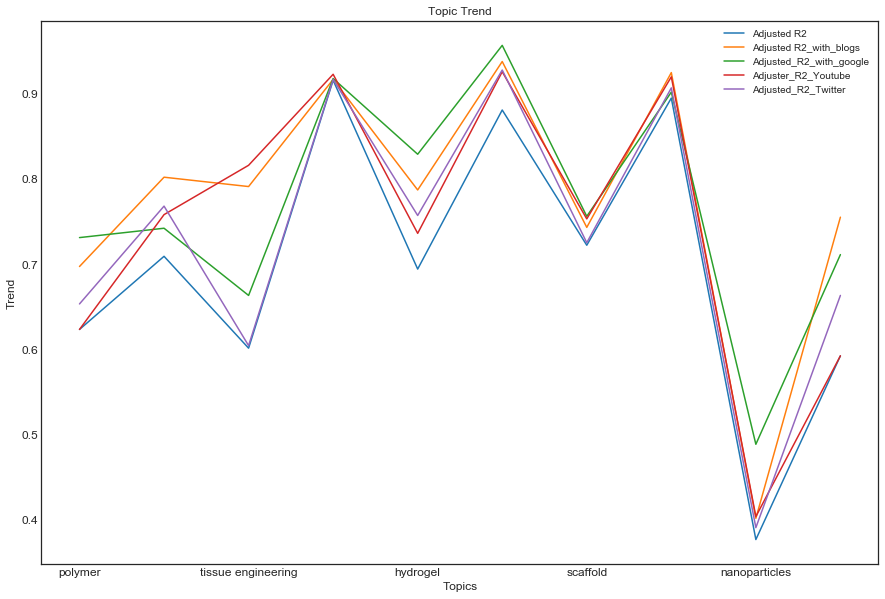

In [87]:
adjusted_r = pd.read_excel('Adjusted_R.xlsx')
import matplotlib.pyplot as plt
ax = adjusted_r[['Adjusted R2','Adjusted R2_with_blogs','Adjusted_R2_with_google','Adjuster_R2_Youtube','Adjusted_R2_Twitter']].plot(kind='line', title ="Topic Trend", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Topics", fontsize=12)
ax.set_ylabel("Trend", fontsize=12)
ax.set_xticklabels(['bone','polymer','tissue engineering','hydrogel','scaffold','nanoparticles','adhesion','regeneration','microstructure','chitosan'])
plt.show()